<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

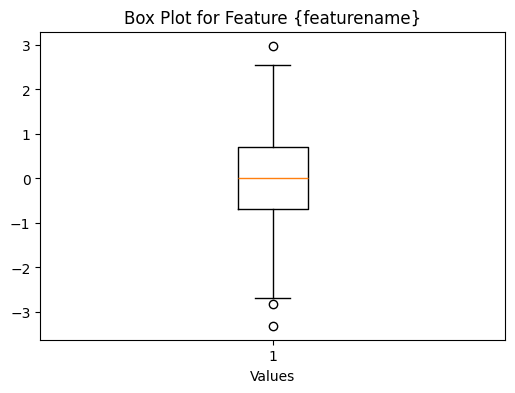

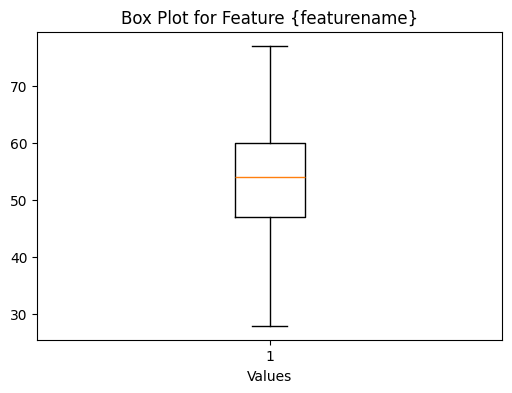

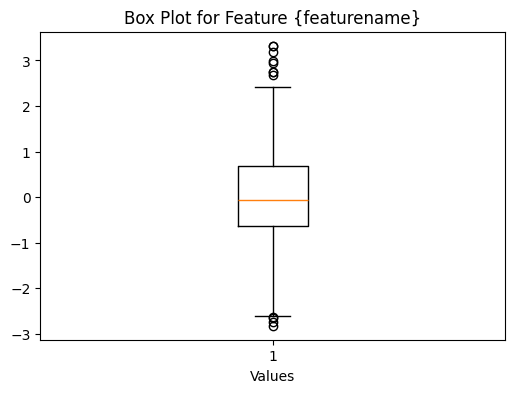

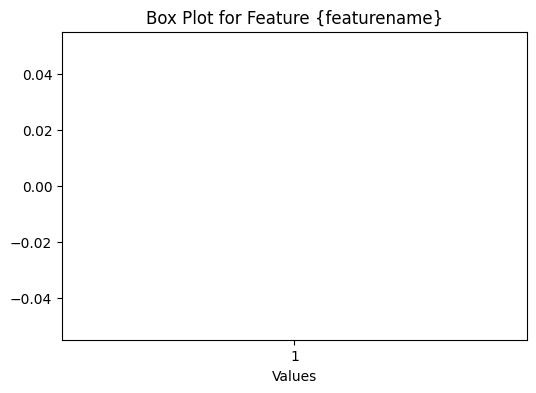

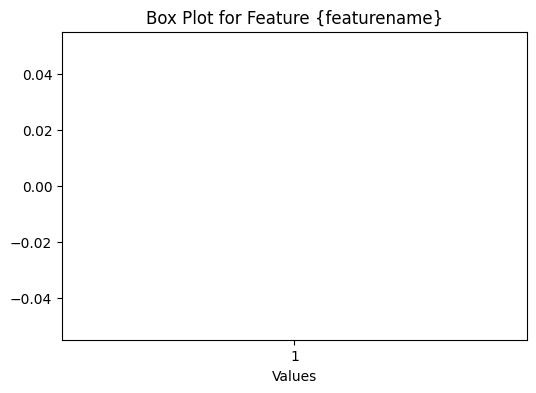

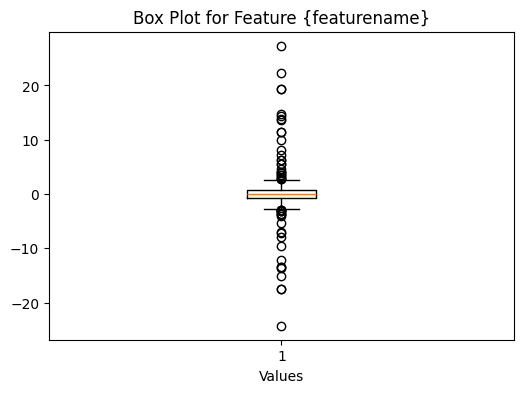

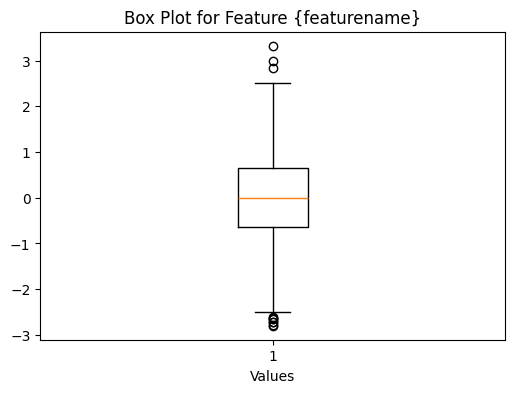

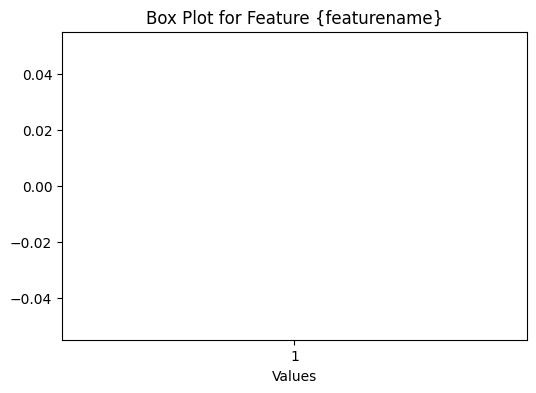

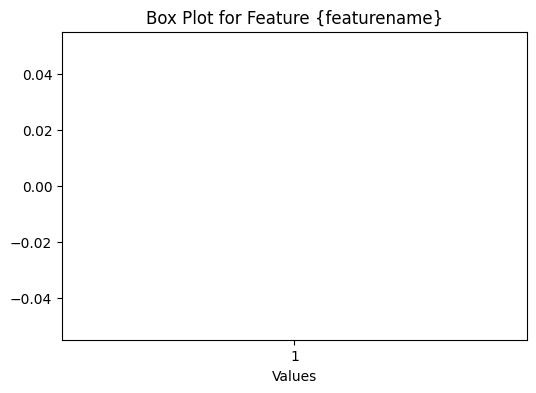

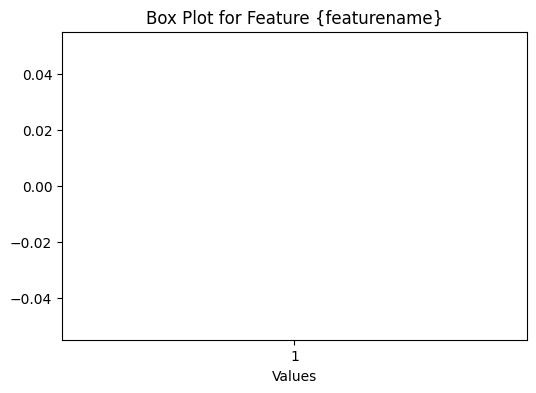

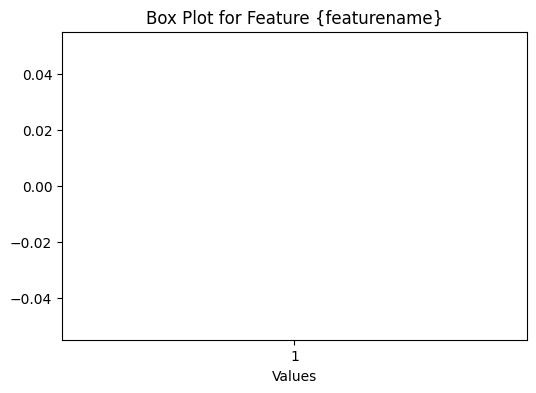

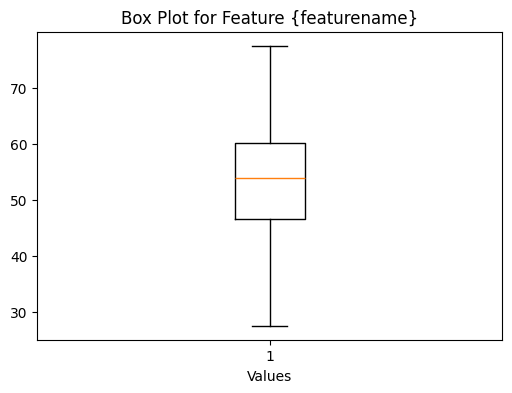

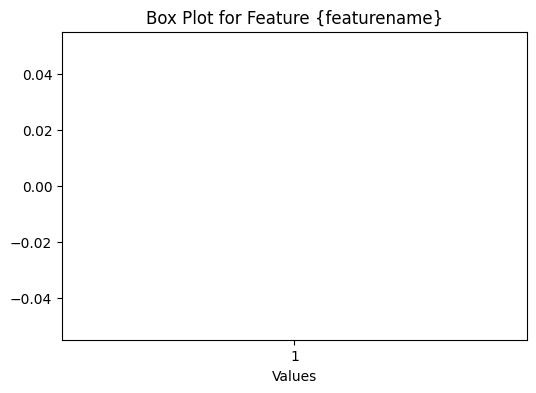

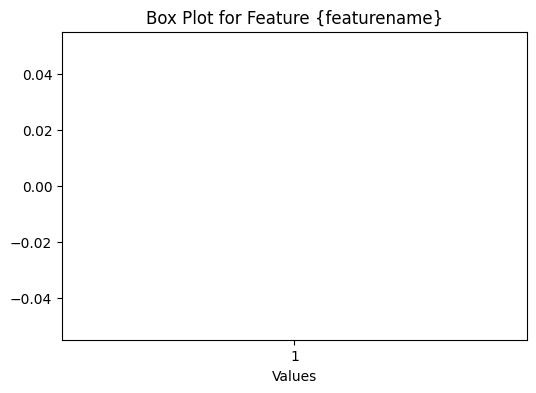

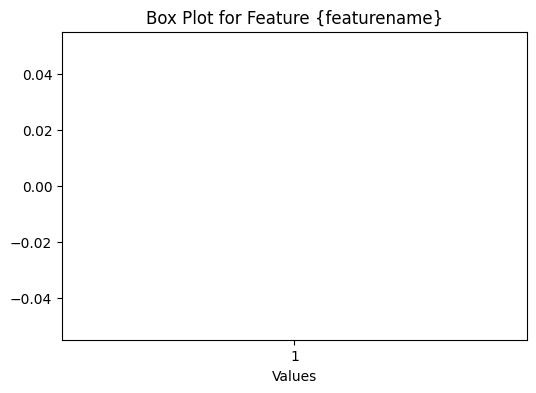

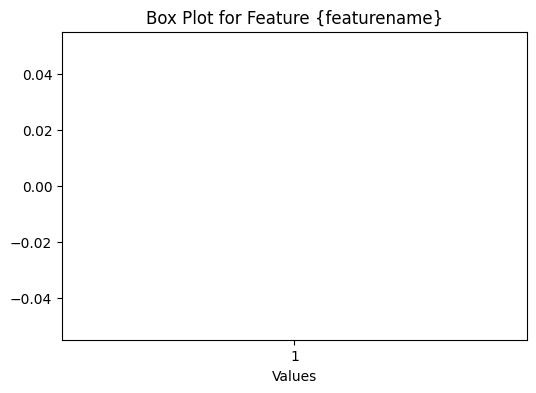

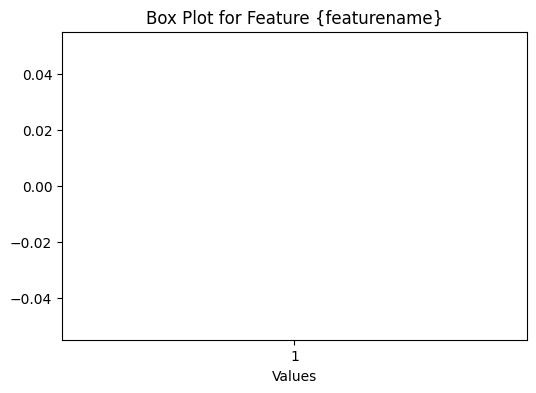

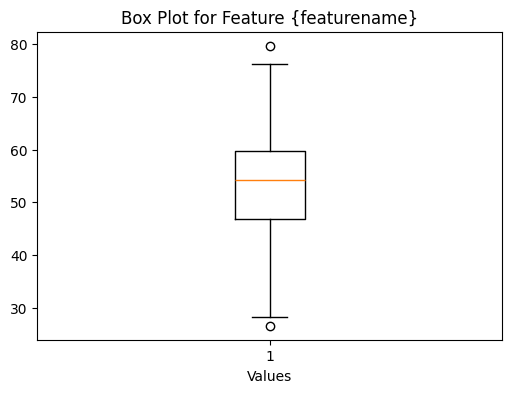

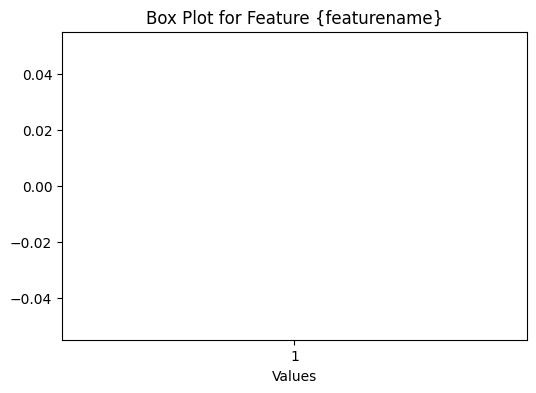

count    1139.000000
mean        0.001349
std         0.977585
min        -3.308750
25%        -0.686976
50%         0.004241
75%         0.712426
max         2.982511
Name: b, dtype: float64
count    1139.000000
mean       53.271291
std         9.506319
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: c, dtype: float64
count    1139.000000
mean       -0.000488
std         1.009635
min        -2.820047
25%        -0.633057
50%        -0.051560
75%         0.691117
max         3.323155
Name: f, dtype: float64
count    1103.000000
mean      202.213962
std       109.289943
min         0.000000
25%       178.000000
50%       225.000000
75%       270.000000
max       603.000000
Name: h, dtype: float64
count    560.000000
mean      -0.597303
std        1.051954
min       -5.954661
25%       -1.114117
50%       -0.324970
75%        0.133227
max        1.369476
Name: j, dtype: float64
count    1139.000000
mean        0.024466
std   

/Users/rachel/Desktop/binf5507/Assignment1/Scripts/data_preprocessor.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[x].fillna(data[x].mean(), inplace=True)


In [14]:
## Import necessary modules
import data_preprocessor as dp
import functionals as f
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 1. Load the dataset
messy_data = pd.read_csv('../Data/messy_data.csv')
clean_data = messy_data.copy()

# Dataset Exploration
clean_data.head()
clean_data.describe()
clean_data.info() # Shows missing entries are present in most columns
clean_data.shape

## Handling Missing Values 
# Fill in target values where possible 
clean_data.loc[clean_data['a'] == "normal", 'target'] = 0
clean_data.loc[clean_data['a'] == "lv hypertrophy", 'target'] = 1
# Remove rows where the target value cannot be filled in
clean_data = clean_data.dropna(subset=['target'])

# Missing numerical data will be imputed - further investigation of missing categorical data
categorical_cols = clean_data.select_dtypes(exclude='number')
for x in categorical_cols:
    print(x)
    print(clean_data[x].isna().sum())

# Removal of features with too much missing data 
clean_data = clean_data.drop(['d'], axis = 1)

## Identify outliers via vizualization 
numerical_cols = clean_data.select_dtypes(include='number')
numerical_cols_2 = numerical_cols.drop(['target'], axis=1)
cols = [*numerical_cols_2]
for column in cols:
    featurename = clean_data[column]
    plt.figure(figsize=(6,4))
    plt.boxplot(clean_data[column])
    plt.title("Box Plot for Feature {featurename}")
    plt.xlabel("Values")
    plt.show()

# Generate quantile reports for all numerical data prior to applying the data preprocessor
numerical_cols = clean_data.select_dtypes(include='number')
numerical_cols_2 = numerical_cols.drop(['target'], axis=1)
cols = [*numerical_cols_2]
summary_stats = []
for column in cols:
    summary_stats_before = print(clean_data[column].describe())

# 2. Preprocess the data
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.normalize_data(clean_data)
clean_data = dp.remove_redundant_features(clean_data)

# Review changes to the dataset
clean_data.info()
clean_data.describe()
clean_data.shape
# Generate quantile reports again for comparison purposes
numerical_cols = clean_data.select_dtypes(include='number')
numerical_cols_2 = numerical_cols.drop(['target'], axis=1)
cols = [*numerical_cols_2]
summary_stats = []
for column in cols:
    summary_stats_after = print(clean_data[column].describe())

# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)


# 4. Train and evaluate the model
f.simple_model(clean_data, print_report=True)